<h2>News Detection - Machine Learning </h2>

we going to use this dataset from kaggle to explore and create the news detection model is applied by classification model

<h3>******************************** Import Dependencies ********************************</h3>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns

import nltk
from nltk.corpus import stopwords
import string
#from nltk.tag.stanford import POSTagger
import os
import re

import numpy as np
#from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences

<h3>******************************** Load Dataset ********************************</h3>

In [4]:
#import the dataset
real_df = pd.read_csv('news_dataset/real.csv')
fake_df = pd.read_csv('news_dataset/fake.csv')

In [5]:
#add label
#create new variable
#df1 = real_df.assign(label=1)
#df2 = fake_df.assign(label=0)

In [6]:
#concat the dataframe
#fake news = 1
#real news = 0
fake_df['isfake'] = 1
real_df['isfake'] = 0
#fake_df = fake_df[0:5000]
#real_df = real_df[0:5000]
data = pd.concat([fake_df,real_df],ignore_index=True)
data.head(3)

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1


<h3>******************************** Data Wragnling ********************************</h3>

In [7]:
#check the rows and columns of dataframe
data.shape

(44898, 5)

In [8]:
#check the column's name
data.columns

Index(['title', 'text', 'subject', 'date', 'isfake'], dtype='object')

In [9]:
#check data types of dataframe
dict(data.dtypes)

{'title': dtype('O'),
 'text': dtype('O'),
 'subject': dtype('O'),
 'date': dtype('O'),
 'isfake': dtype('int64')}

In [10]:
#check null or not
data.isnull().any()

title      False
text       False
subject    False
date       False
isfake     False
dtype: bool

In [11]:
#let's sum the null
data.isnull().sum()

title      0
text       0
subject    0
date       0
isfake     0
dtype: int64

In [12]:
#check duplicated values
if data.duplicated().any() == True:
    print("Dataset has duplicated values")
else:
    print("No duplicated values")
    
print("Before dropped")
print(data.shape)

Dataset has duplicated values
Before dropped
(44898, 5)


In [13]:
#drop the duplicates values
data.drop_duplicates(keep=False, inplace=True)
print("After dropped")
print(data.shape)

After dropped
(44493, 5)


In [14]:
#drop date columns
data.drop('date', inplace=True, axis=1)

In [15]:
#merge the series
data['news'] = data['title'] + data['text']

In [16]:
#drop the columns
data.drop(['title', 'text'], axis=1, inplace=True)

In [17]:
data.head(2)

,subject,isfake,news
0,News,1,Donald Trump Sends Out Embarrassing New Year’...
1,News,1,Drunk Bragging Trump Staffer Started Russian ...


In [18]:
#change the position of index of columna
data = data[['news', 'subject', 'isfake']]
data.head(2)

,news,subject,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,News,1
1,Drunk Bragging Trump Staffer Started Russian ...,News,1


<h3>******************************** Data Analysis ********************************</h3>

In [19]:
print(data.subject.unique())
print(data.isfake.value_counts())

['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east'
 'politicsNews' 'worldnews']
1    23475
0    21018
Name: isfake, dtype: int64


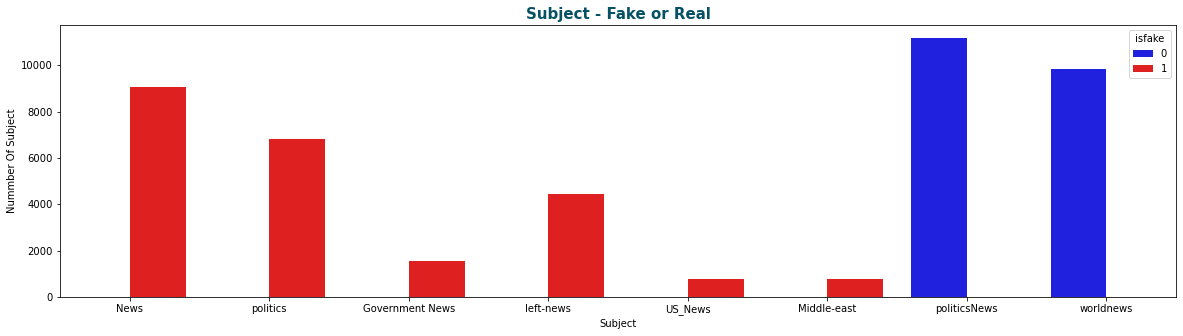

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(x='subject', hue='isfake', palette=['b','r'], data=data)
plt.title('Subject - Fake or Real', fontsize='15', color='#065164', fontweight='bold')
plt.xlabel("Subject")
plt.ylabel('Nummber Of Subject')
plt.xticks(rotation='0')
plt.show()

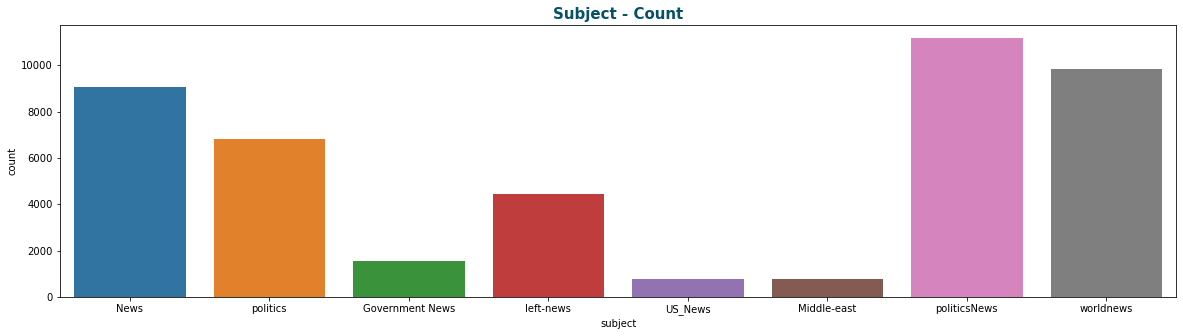

In [21]:
plt.figure(figsize=(20,5))
sns.countplot(x='subject', data=data)
plt.title('Subject - Count', fontsize='15', color='#065164', fontweight='bold')
plt.show()

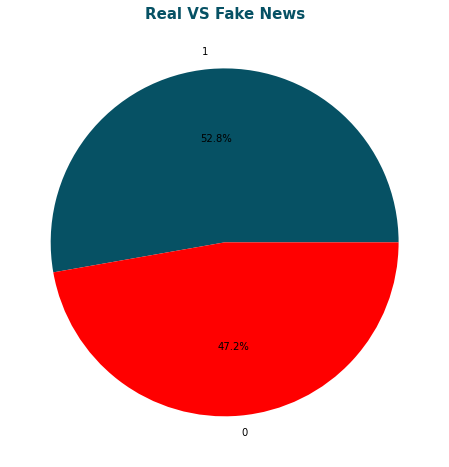

In [22]:
plt.figure(figsize=(15,8))
plt.pie(data['isfake'].value_counts(), labels=data['isfake'].unique()
        ,autopct='%1.1f%%', colors=['#065164', 'r'])
plt.title('Real VS Fake News', fontsize='15',color='#065164', fontweight='bold')
plt.show()

<h3>******************************** Data Preprocessing ********************************</h3>

In [23]:
#check dataset
data.head(2)

,news,subject,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,News,1
1,Drunk Bragging Trump Staffer Started Russian ...,News,1


In [24]:
#define the dataset
dataset = data[['news', 'isfake']]

In [25]:
dataset.head(2)

,news,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1


In [26]:
#download the stop word
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/VotanaSrey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
#create a function to process the text
def preprocess_text(text):
    not_punc = [char for char in text if char not in string.punctuation]
    not_punc = ''.join(not_punc)
    clean_words = [word for word in not_punc.split() if word.lower() not in stopwords.words('english')]
    return clean_words


In [28]:
#test index 0 of dataset
data['news'].head(1).apply(preprocess_text)

0    [Donald, Trump, Sends, Embarrassing, New, Year...
Name: news, dtype: object

In [103]:
#create a function to remove punctuation
def remove_punctuation(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text
remove_pun = lambda x: remove_punctuation(x)

In [104]:
#create a function to convert text into lowercase
def convert_to_lowercase(text):
    text = text.str.lower()
    return text

In [105]:
#remove punctuation
dataset.news = pd.DataFrame(dataset.news.apply(remove_pun))

In [106]:
#convert feedback to lowercase
dataset.news = convert_to_lowercase(dataset.news)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
bw = CountVectorizer(analyzer=preprocess_text).fit_transform(data['news'])

#this take much time to run so ...
#I will import new cleaned data that new the code above run
#dataset = pd.read_csv('news_cleaned_data.csv')
#dataset.drop('Unnamed: 0', axis=1, inplace=True)
#dataset = dataset[['news', 'isfake']]

<h3>******************************** Train Model ********************************</h3>

In [108]:
#apply train test split function
x_train, x_test, y_train, y_test = train_test_split(bw, data['isfake'], test_size=0.2, random_state=123)

In [87]:
print(X.shape)
print(Y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(44480,)
(44480,)
(35594, 310737)
(8899, 310737)
(35594,)
(8899,)


In [107]:
#train the model using naive_bayeszzzz
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
model = classifier.fit(x_train, y_train)
#print(model)

<h3>******************************** Evaluate Model ********************************</h3>

In [91]:
#let's predict new data test
y_pred_test = model.predict(x_test)

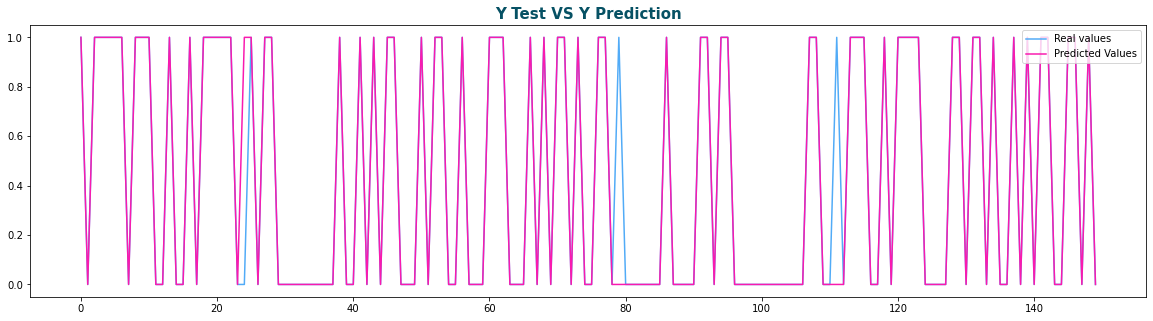

In [92]:
#set it as dataframe
prediction_values = pd.DataFrame(list(zip(y_pred_test, y_test)), columns=['predicted_values', 
                                                                           'real_values'])

plt.figure(figsize=(20, 5))
plt.plot(y_test[0:150].ravel(), label='Real values', color='#51ABF7')
plt.plot(prediction_values['predicted_values'][0:150].ravel(), label='Predicted Values', color='#F91AAF')

plt.title('Y Test VS Y Prediction',color="#065164",fontsize='15', fontweight='bold')
plt.legend(loc=1)
plt.show()

In [93]:
#evaluate the model accuracy
from sklearn.metrics import classification_report
print("*" * 20, "Test Set","*" * 20)
print()
print(classification_report(y_test,y_pred_test))

******************** Test Set ********************

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4314
           1       0.99      0.97      0.98      4585

    accuracy                           0.98      8899
   macro avg       0.98      0.98      0.98      8899
weighted avg       0.98      0.98      0.98      8899



In [94]:
#evaluate the model accuracy
from sklearn.metrics import classification_report
y_pred_train = model.predict(x_train)
print("*" * 20, "Train Set","*" * 20)
print()
print(classification_report(y_train,y_pred_train))

******************** Train Set ********************

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     16704
           1       0.99      0.98      0.99     18890

    accuracy                           0.99     35594
   macro avg       0.99      0.99      0.99     35594
weighted avg       0.99      0.99      0.99     35594



<h3>******************************** Deploy Model ********************************</h3>

In [111]:
#export ml model
import pickle
with open('fake_news_detection_machine_learning_naive_bayes.pickle', 'wb') as f:
    #model 
    pickle.dump(model, f)